In [1]:
# --- matplotlib --------------------------------------------------------------
import matplotlib.pyplot as plt

# --- numpy -------------------------------------------------------------------
import numpy as np

# --- Our own modules ---------------------------------------------------------
import sys

# permatent location of functions from pyFitXPS
sys.path.insert(0, '/home/julio/Python/pyFitXPS/pyfitxps/') # Julio Laptop


In [2]:
import spec_xy_files as spxy
import fitxps 
import plot_config

In [3]:
experiment = spxy.load_xps_data("data/Aurobax200.xy")


Loaded multi-region file: Aurobax200.xy

Summary of XPS Data:
-----------------------------------------------------------------------------------
| Region | BE Range (eV)   | Pass Energy | Energy Step | Values | Scans | Comment |
-----------------------------------------------------------------------------------
| S (0)  | -170.0 - -158.0 | 20          | 0.050       | 241    | 19    |         |
| C (0)  | -290.0 - -280.0 | 20          | 0.050       | 201    | 9     |         |
| Au (0) | -94.0 - -80.0   | 20          | 0.050       | 281    | 4     |         |
| O (0)  | -537.0 - -530.0 | 20          | 0.050       | 141    | 19    |         |
| VB     | -12.0 - 2.0     | 20          | 0.050       | 281    | 4     |         |
| S (1)  | -170.0 - -158.0 | 20          | 0.050       | 241    | 19    |         |
| C (1)  | -290.0 - -280.0 | 20          | 0.050       | 201    | 9     |         |
| Au (1) | -94.0 - -80.0   | 20          | 0.050       | 281    | 4     |         |
| O (1)  | -5

(<Figure size 1500x800 with 6 Axes>,
 array([[<Axes: title={'center': 'VB Regions'}, xlabel='Binding Energy (eV)', ylabel='Intensity (a.u.)'>,
         <Axes: title={'center': 'Au  Regions'}, xlabel='Binding Energy (eV)', ylabel='Intensity (a.u.)'>,
         <Axes: title={'center': 'S  Regions'}, xlabel='Binding Energy (eV)', ylabel='Intensity (a.u.)'>],
        [<Axes: title={'center': 'C  Regions'}, xlabel='Binding Energy (eV)', ylabel='Intensity (a.u.)'>,
         <Axes: title={'center': 'O  Regions'}, xlabel='Binding Energy (eV)', ylabel='Intensity (a.u.)'>,
         <Axes: >]], dtype=object))

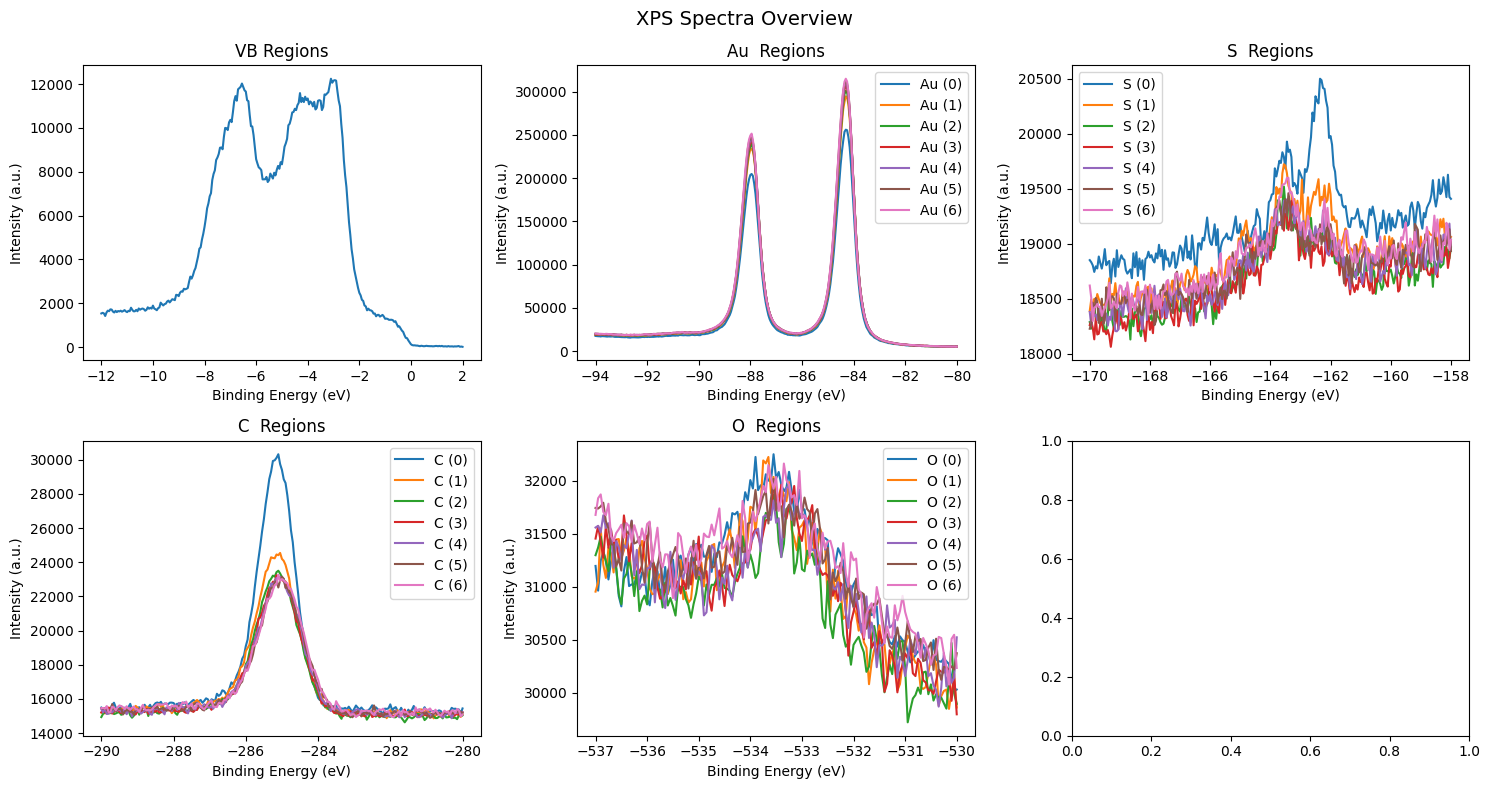

In [4]:
experiment.plot_all_regions(['VB', 'Au ', 'S ', 'C ', 'O '])

In [5]:
s0 = experiment.spectra['S (0)']

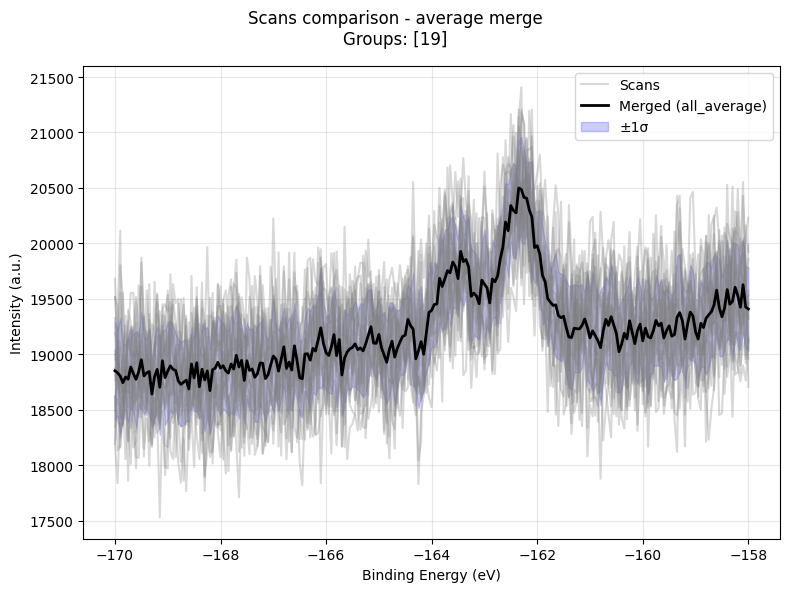

In [6]:

fig, axes = plot_config.compare_scans_merged(
    spectrum=s0,
    merged_label='all_average'
)
plt.show()

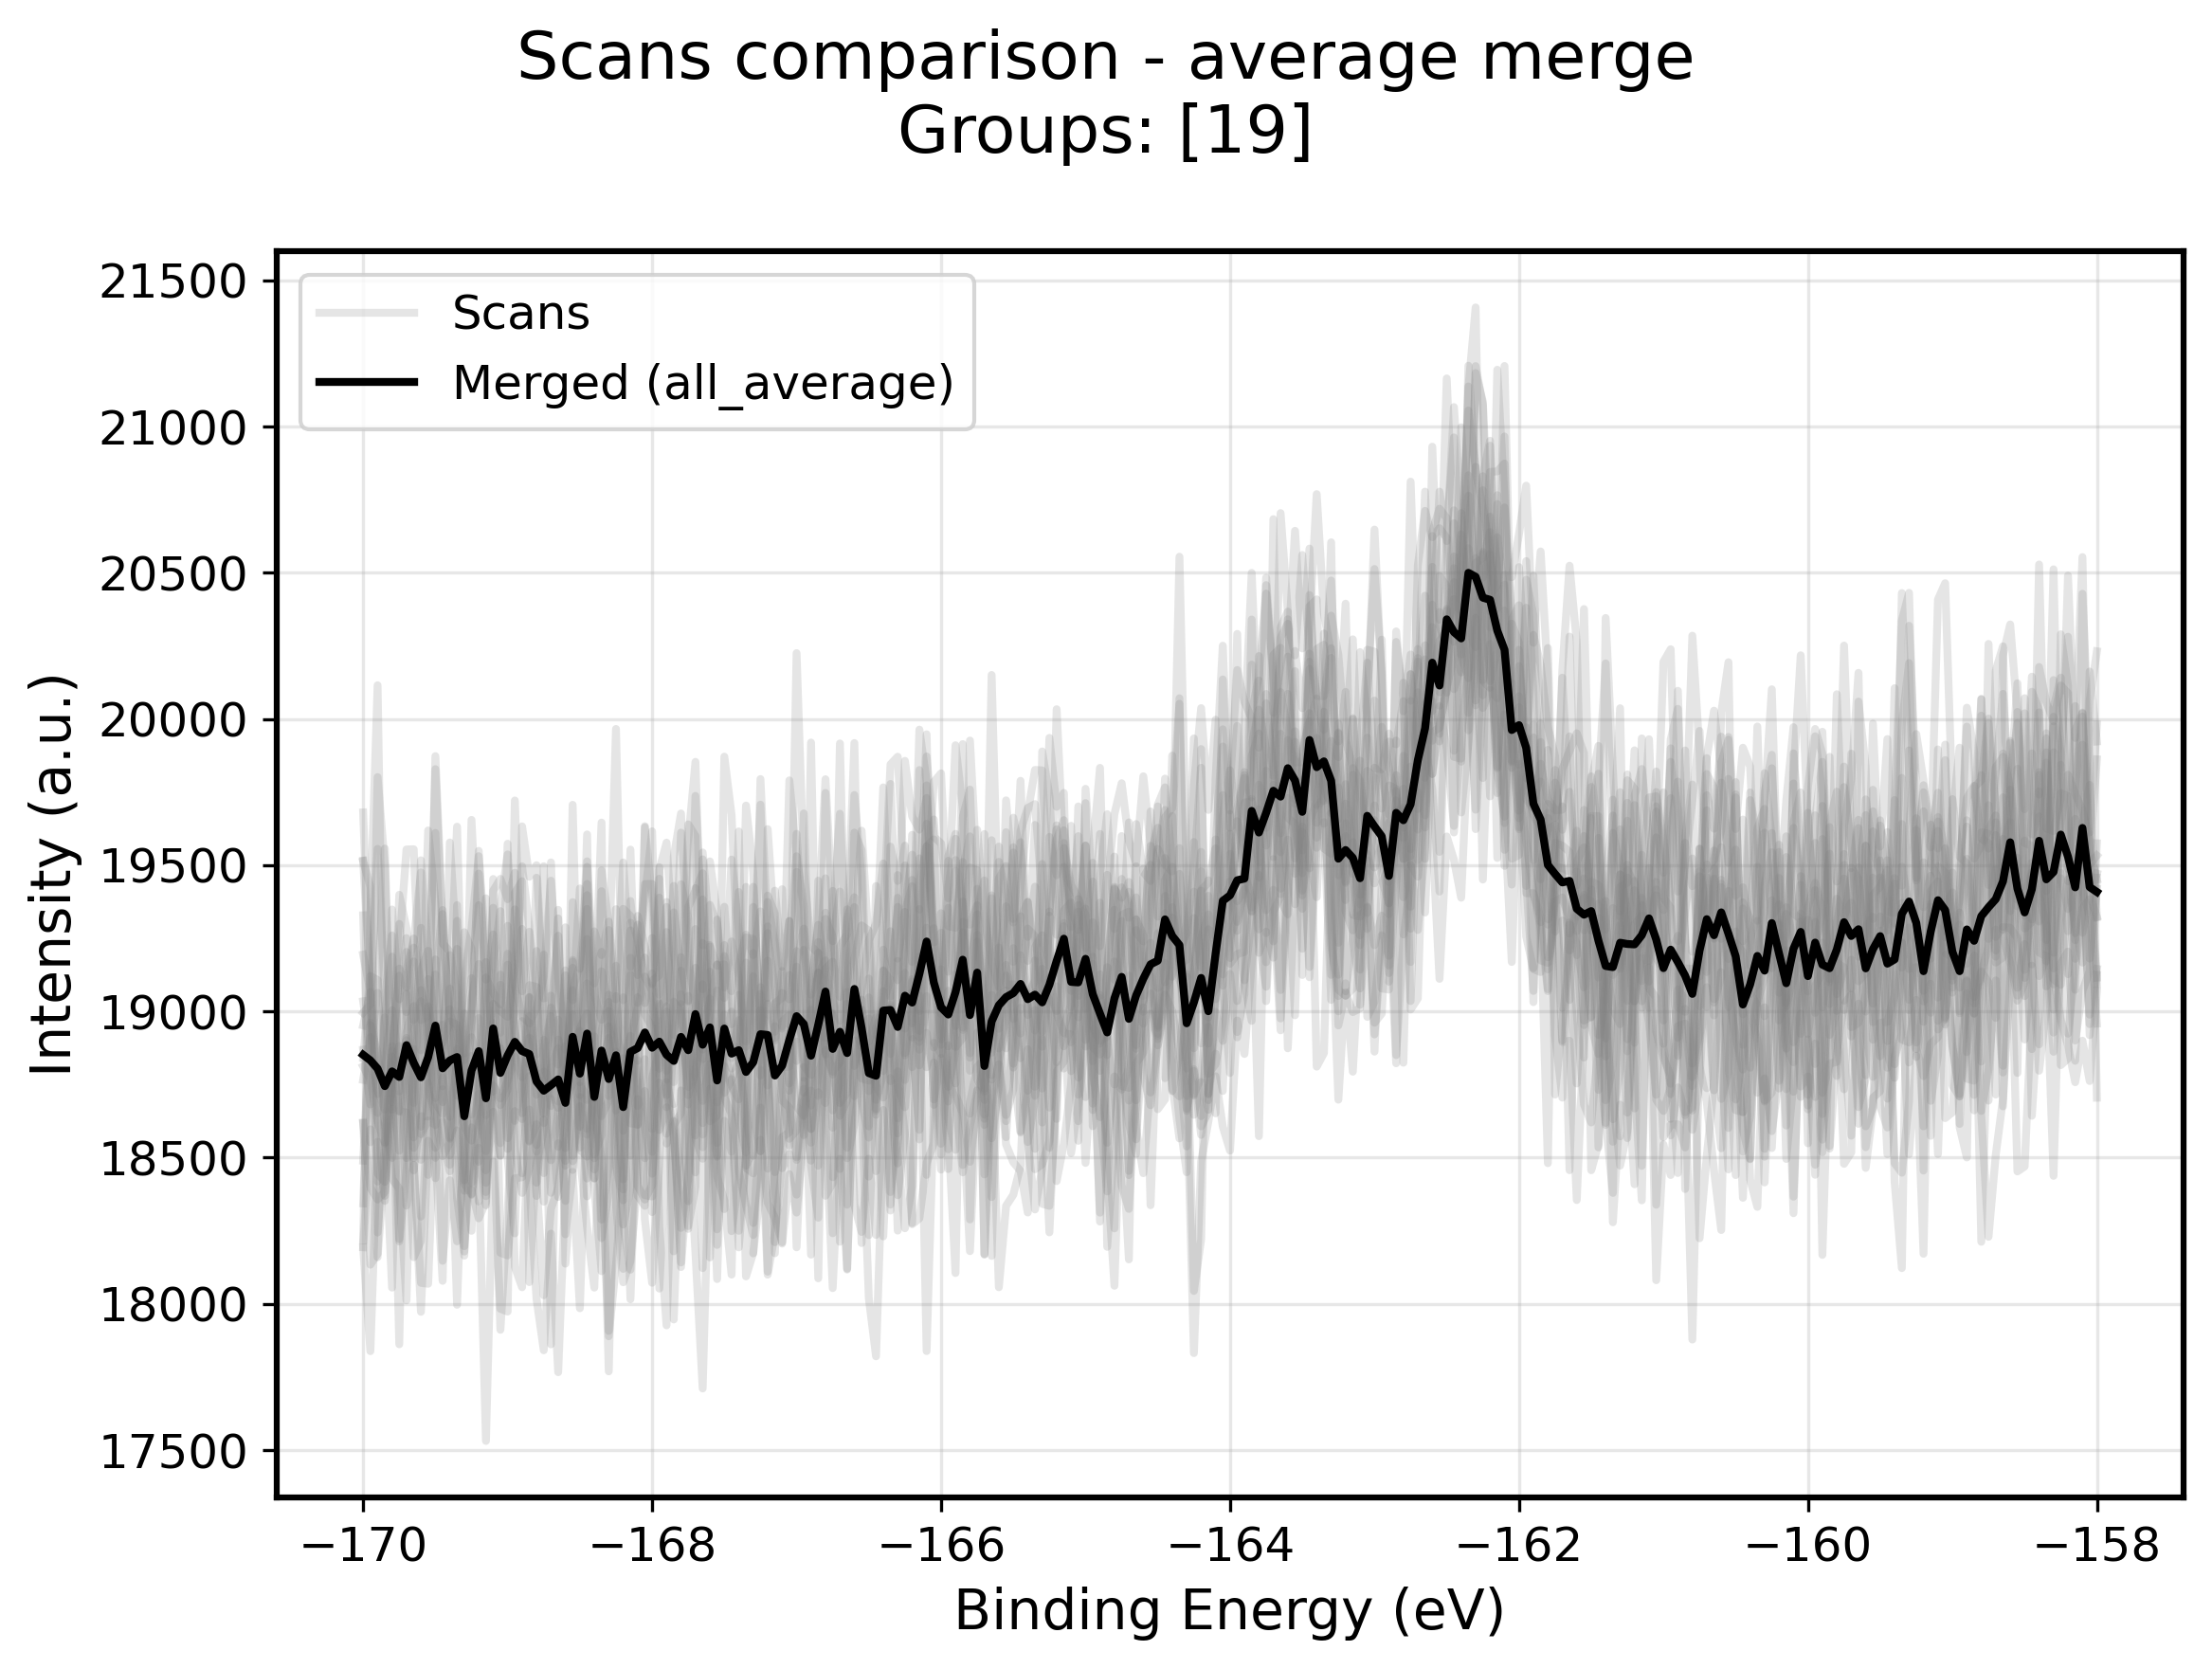

In [7]:
# More detailed analysis
plot_config.set_plot_style('presentation')  # Optional: set publication style
fig, axes = plot_config.compare_scans_merged(
    spectrum=s0,
    merged_label='all_average',
    normalize=False,
    show_residuals=False,
    show_std=False,
    alpha_scans=0.2  # Make individual scans more transparent
)
# plt.savefig('scans_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# First, create different merges
experiment.spectra['S (0)'].merge_scan_groups(group_size=2, label='groups_2')
experiment.spectra['S (0)'].merge_scan_groups(n_groups=4, label='groups_4')



Scan grouping summary for 'groups_2':
Original scans: 19
Groups created: 9
Group sizes: [3, 2, 2, 2, 2, 2, 2, 2, 2]
Merge method: average

Scan grouping summary for 'groups_4':
Original scans: 19
Groups created: 4
Group sizes: [5, 5, 5, 4]
Merge method: average


{'original_scans': 19,
 'groups_created': 4,
 'group_sizes': [5, 5, 5, 4],
 'method': 'average'}

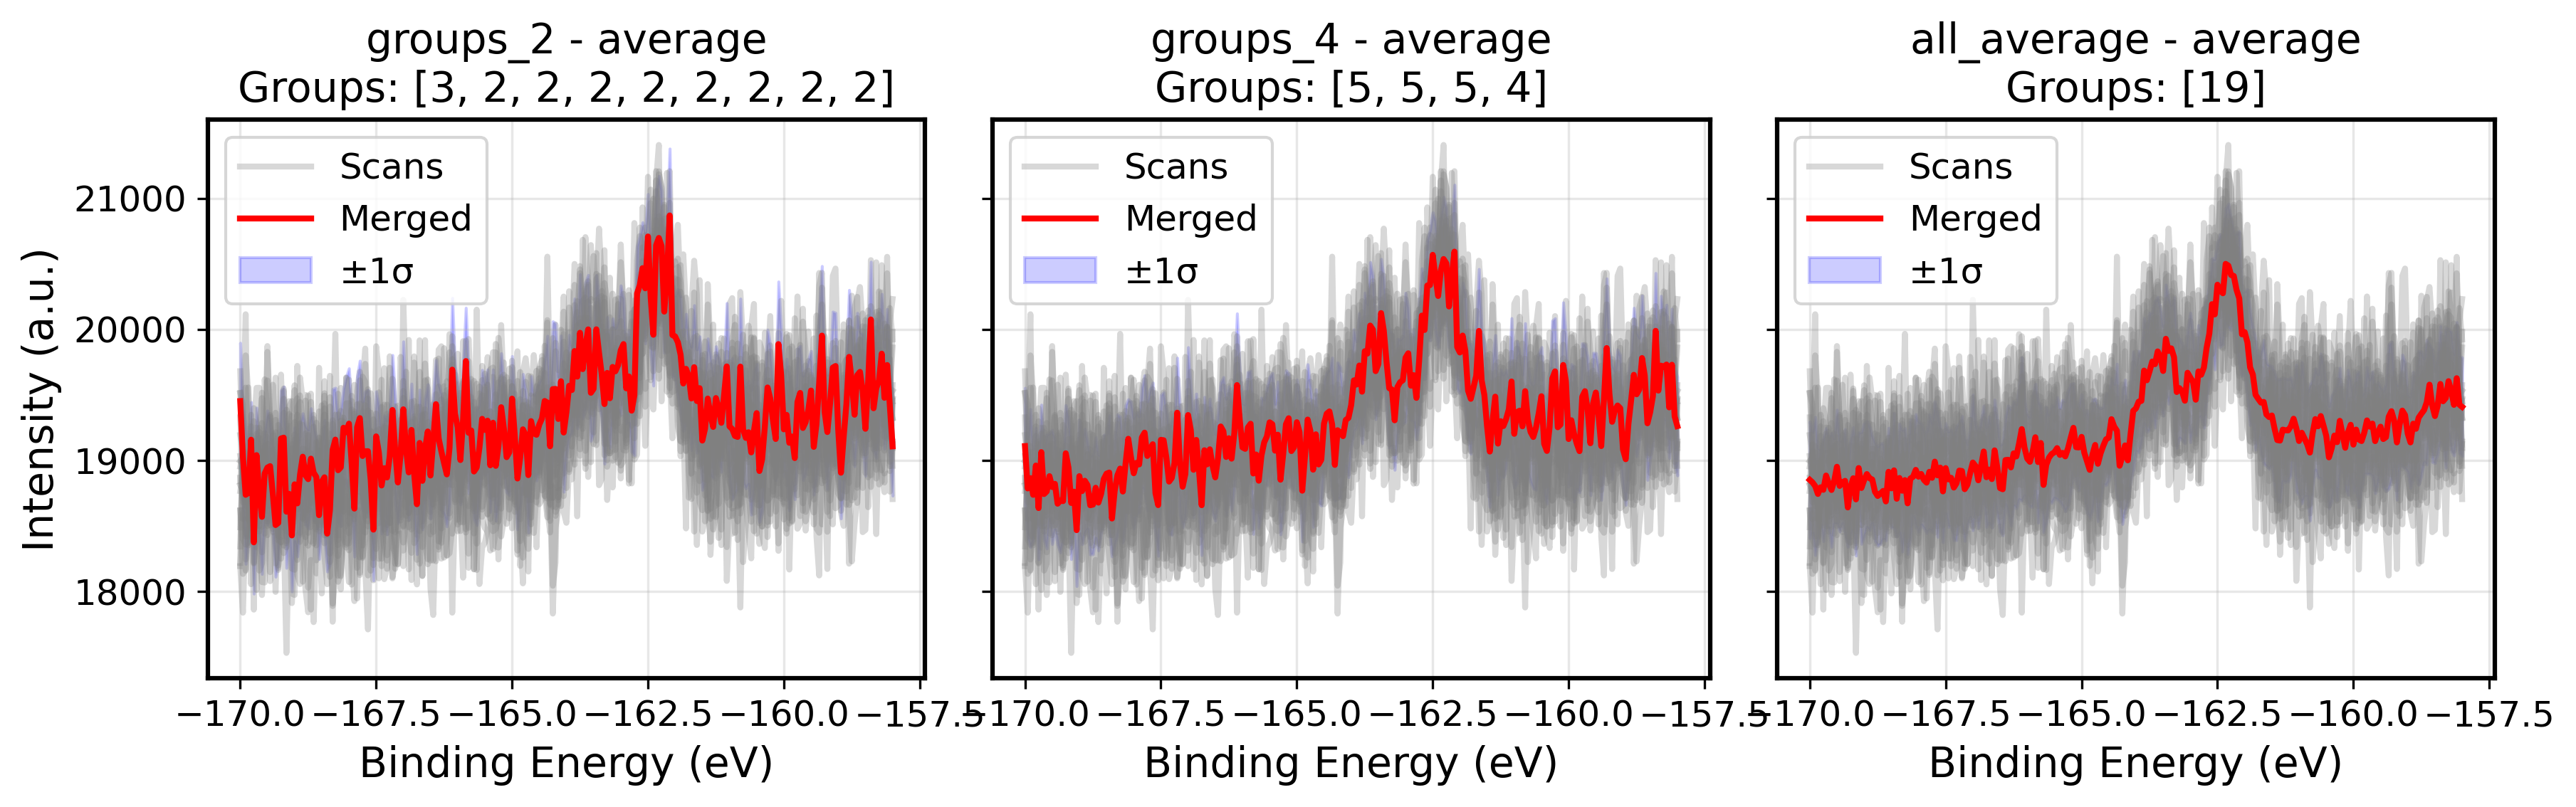

In [9]:
# Compare just two methods horizontally
fig, axes = plot_config.compare_merge_methods(
    spectrum=experiment.spectra['S (0)'],
    merge_labels=['groups_2', 'groups_4', 'all_average'],
    figsize=(12, 4),
    orientation='horizontal',
    normalize=False
)
plt.show()

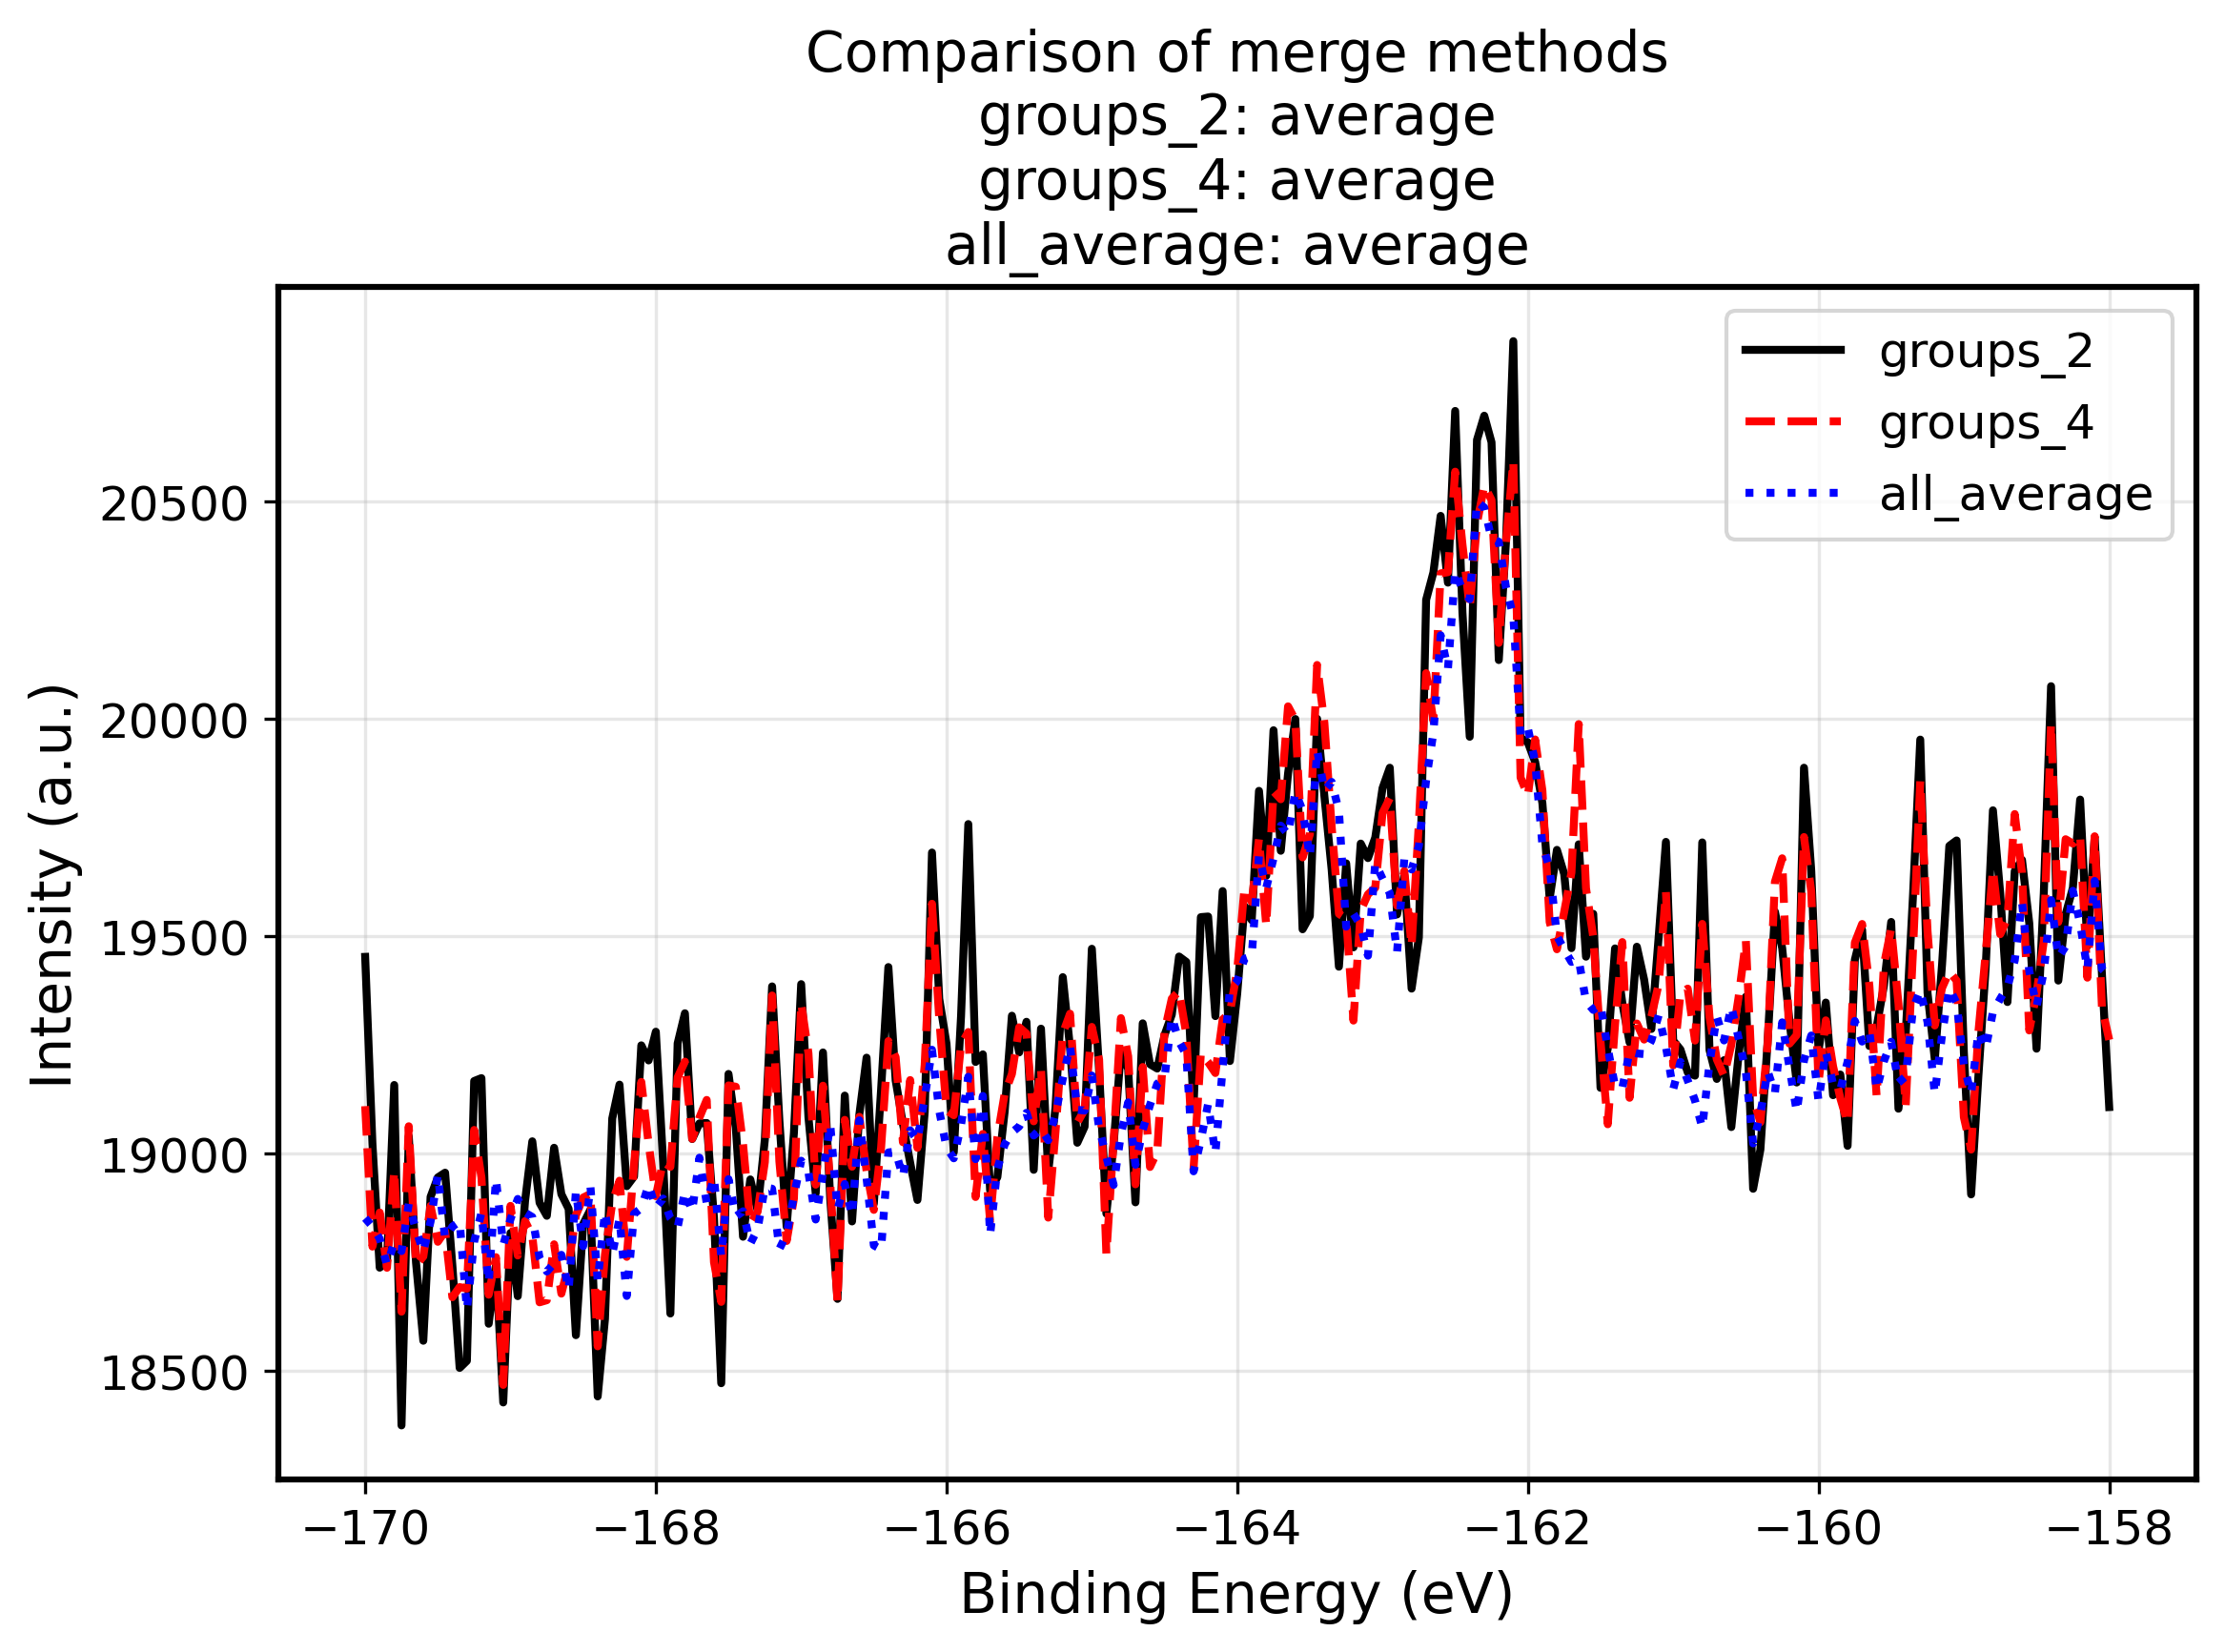

In [10]:
# Basic comparison
fig, ax = plot_config.compare_merged_scans(
    spectrum=experiment.spectra['S (0)'],
    merge_labels=['groups_2', 'groups_4', 'all_average']
)
plt.show()

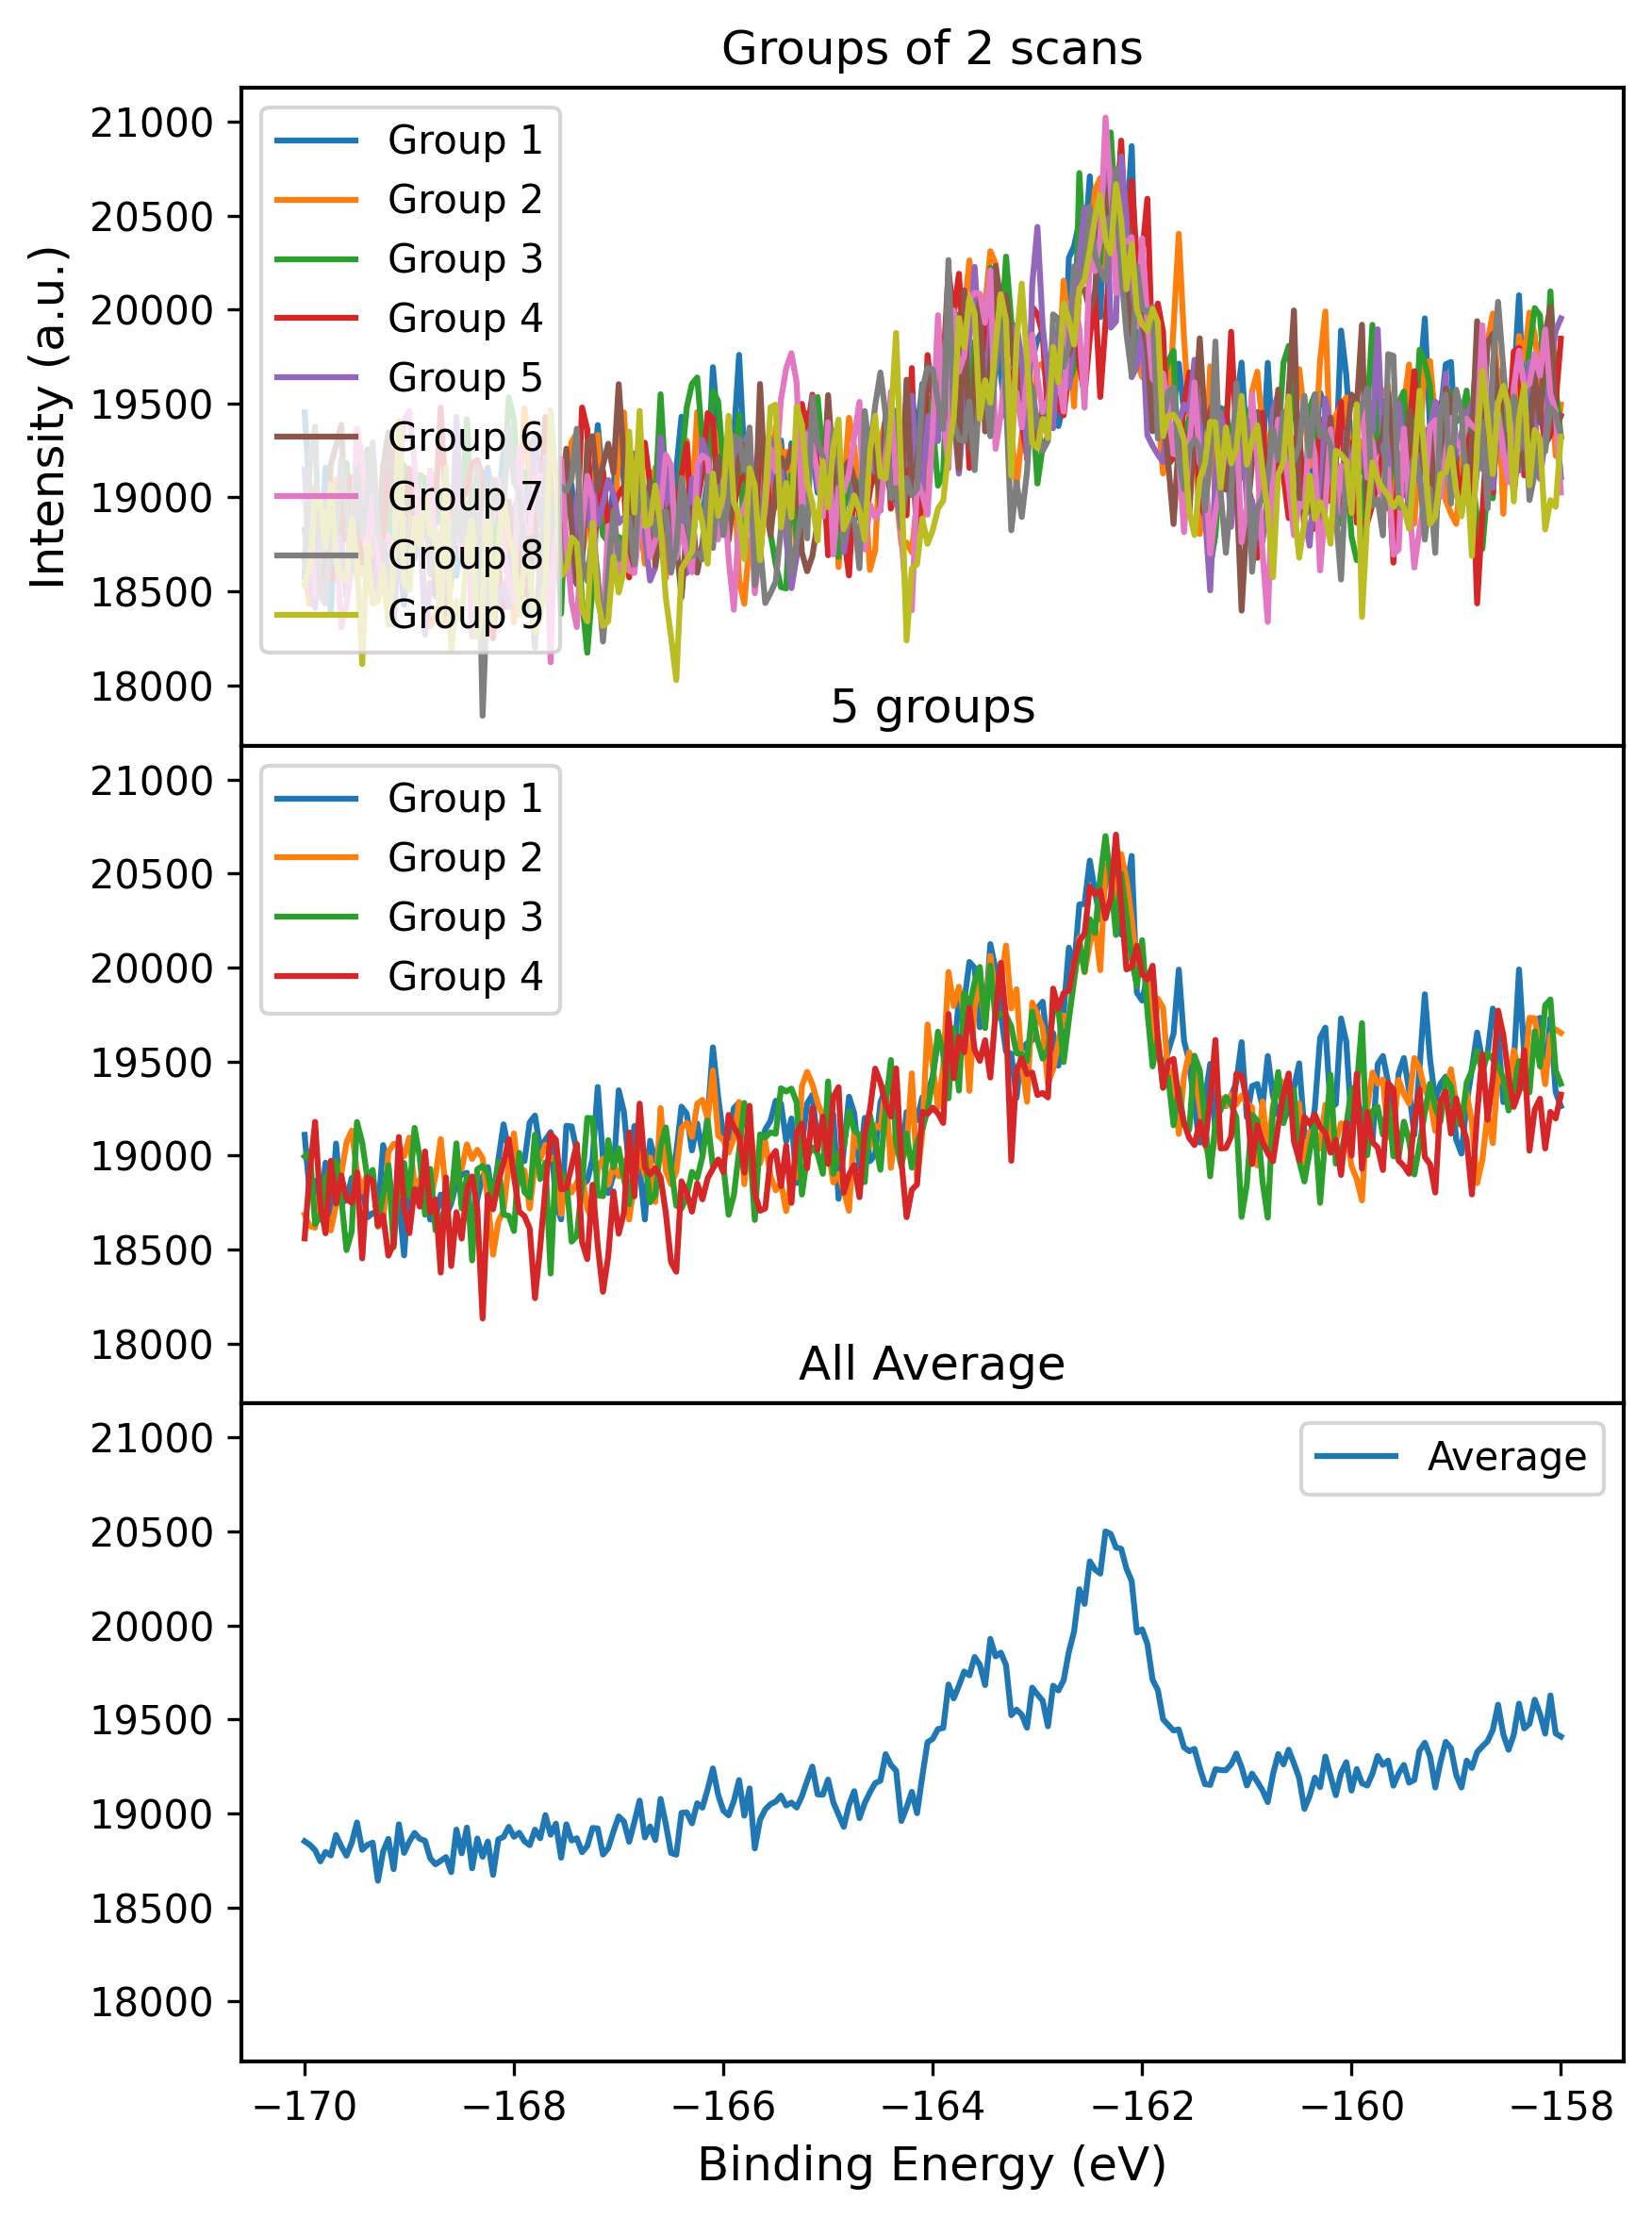

In [37]:
plot_config.set_plot_style('paper')

fig = plt.figure(figsize=(6, 8))
gs = fig.add_gridspec(3, wspace=0, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)


# Plot all scans in groups_2
for i in range(len(experiment.spectra['S (0)'].working_data.merged_scans['groups_2']['data'])):
    axs[0].plot(experiment.spectra['S (0)'].working_data.binding_energy, 
             experiment.spectra['S (0)'].working_data.merged_scans['groups_2']['data'][i],
             label=f'Group {i+1}')

# Plot all scans in groups_4
for i in range(len(experiment.spectra['S (0)'].working_data.merged_scans['groups_4']['data'])):
    axs[1].plot(experiment.spectra['S (0)'].working_data.binding_energy, 
             experiment.spectra['S (0)'].working_data.merged_scans['groups_4']['data'][i],
             label=f'Group {i+1}')

# Plot average
axs[2].plot(experiment.spectra['S (0)'].working_data.binding_energy, 
         experiment.spectra['S (0)'].working_data.merged_scans['all_average']['data'][0],
         label='Average')

# Add labels and legends
axs[0].set_title('Groups of 2 scans')
axs[1].set_title('5 groups')
axs[2].set_title('All Average')

axs[0].legend()
axs[1].legend()
axs[2].legend()

# ax1.set_xlabel('Binding Energy (eV)')
# ax2.set_xlabel('Binding Energy (eV)')
axs[2].set_xlabel('Binding Energy (eV)')
axs[0].set_ylabel('Intensity (a.u.)')

plt.tight_layout()
plt.show()

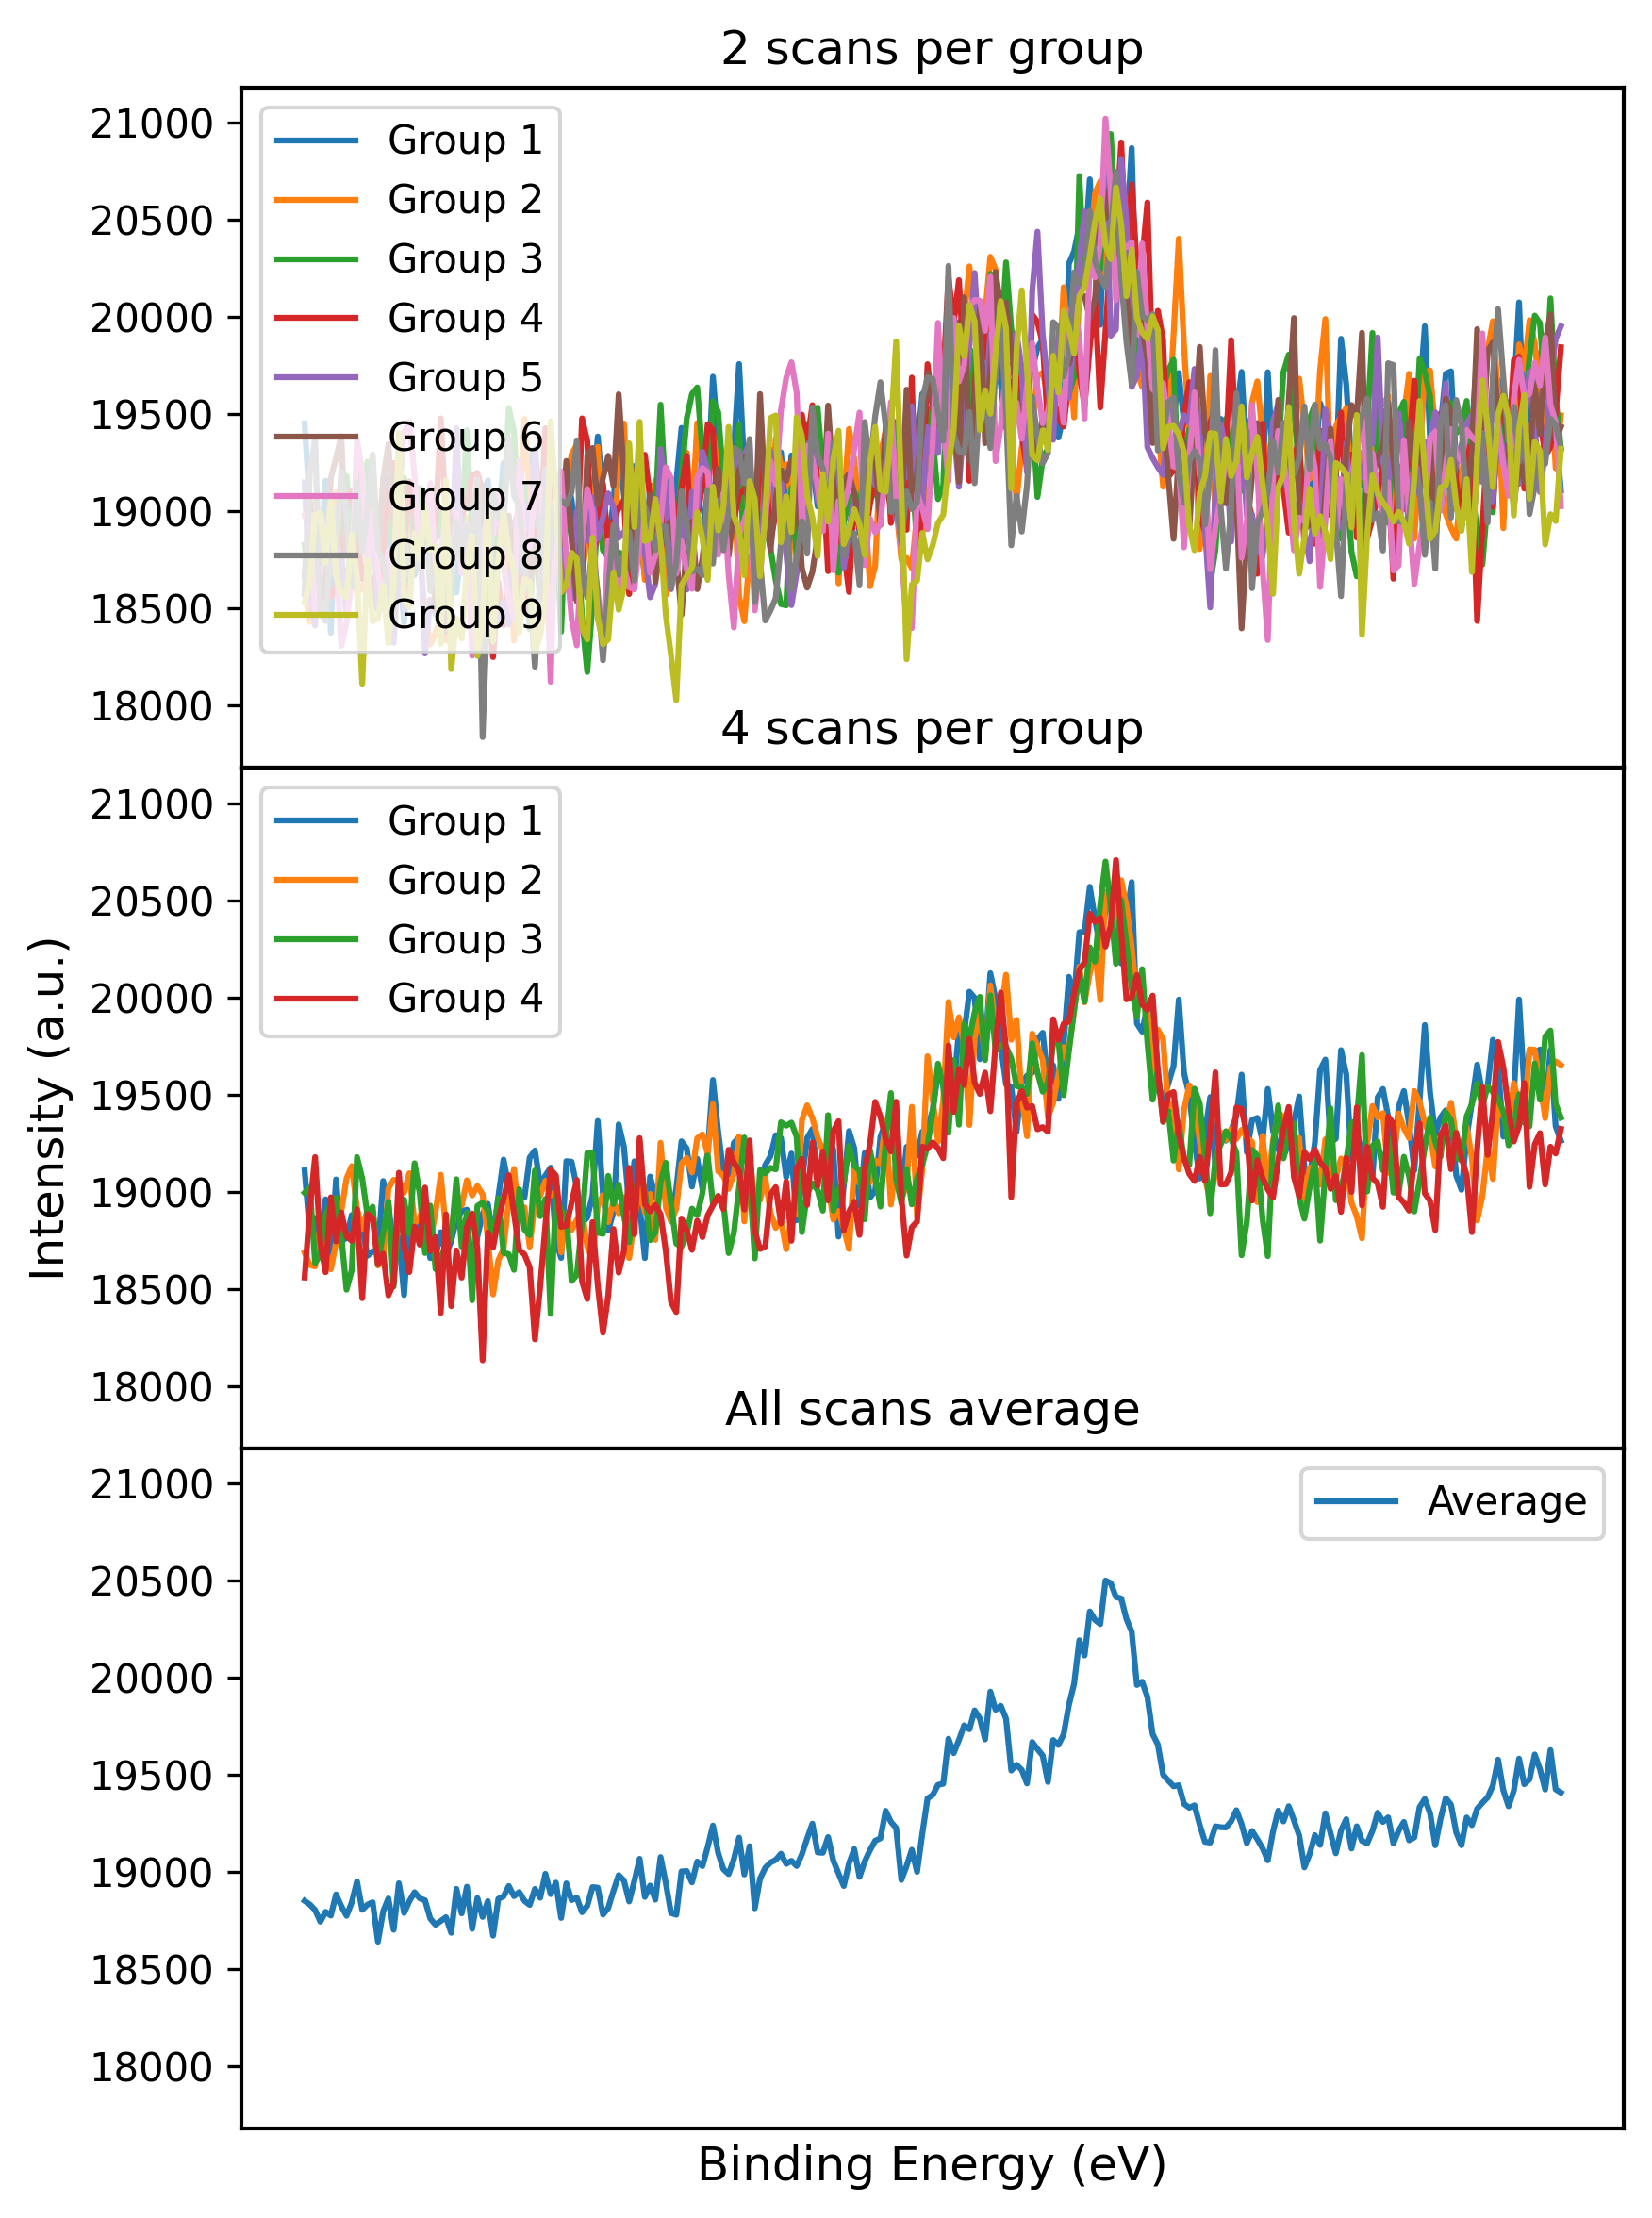

In [38]:
plot_config.set_plot_style('paper')

# Create figure with shared axes
fig = plt.figure(figsize=(6, 8))
gs = fig.add_gridspec(3, wspace=0, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

# Get data
x = experiment.spectra['S (0)'].working_data.binding_energy
merged_scans = experiment.spectra['S (0)'].working_data.merged_scans

# Plot groups of 2
for i in range(len(merged_scans['groups_2']['data'])):
    axs[0].plot(x, merged_scans['groups_2']['data'][i],
                label=f'Group {i+1}')

# Plot groups of 4
for i in range(len(merged_scans['groups_4']['data'])):
    axs[1].plot(x, merged_scans['groups_4']['data'][i],
                label=f'Group {i+1}')

# Plot average
axs[2].plot(x, merged_scans['all_average']['data'][0],
            label='Average')

# Titles and legends
axs[0].set_title('2 scans per group')
axs[1].set_title('4 scans per group')
axs[2].set_title('All scans average')

for ax in axs:
    ax.legend()

# Labels only where needed
axs[-1].set_xlabel('Binding Energy (eV)')
axs[1].set_ylabel('Intensity (a.u.)')  # Middle plot for y label

# Remove unnecessary ticks
for ax in axs[:-1]:
    ax.set_xticks([])

plt.tight_layout()
plt.show()

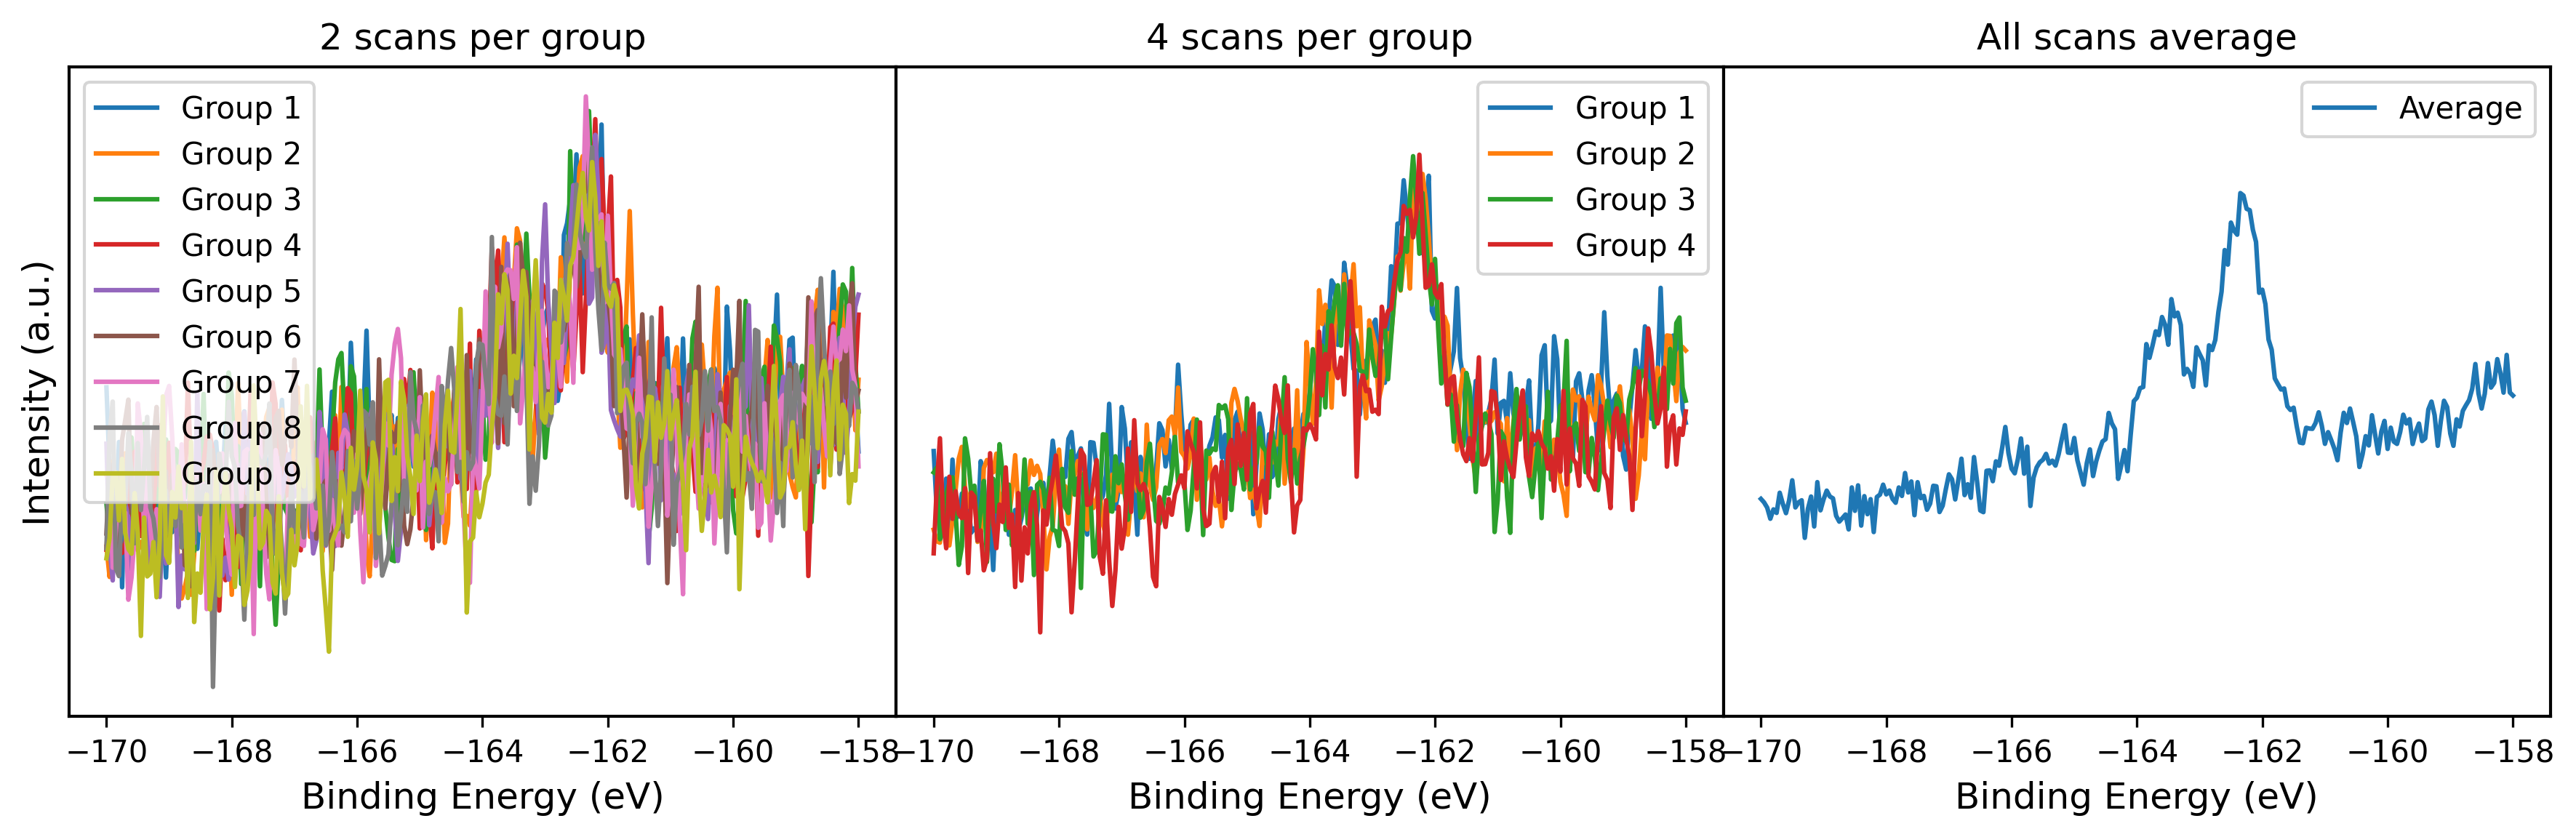

In [39]:
plot_config.set_plot_style('paper')

# Create figure with shared axes
fig = plt.figure(figsize=(12, 4))  # Adjusted figsize for horizontal layout
gs = fig.add_gridspec(1, 3, wspace=0, hspace=0)  # 1 row, 3 columns
axs = gs.subplots(sharey=True)  # Share y-axis

# Get data
x = experiment.spectra['S (0)'].working_data.binding_energy
merged_scans = experiment.spectra['S (0)'].working_data.merged_scans

# Plot groups of 2
for i in range(len(merged_scans['groups_2']['data'])):
    axs[0].plot(x, merged_scans['groups_2']['data'][i],
                label=f'Group {i+1}')

# Plot groups of 4
for i in range(len(merged_scans['groups_4']['data'])):
    axs[1].plot(x, merged_scans['groups_4']['data'][i],
                label=f'Group {i+1}')

# Plot average
axs[2].plot(x, merged_scans['all_average']['data'][0],
            label='Average')

# Titles and legends
axs[0].set_title('2 scans per group')
axs[1].set_title('4 scans per group')
axs[2].set_title('All scans average')

for ax in axs:
    ax.legend()
    ax.set_xlabel('Binding Energy (eV)')

# Y-label only on leftmost plot
axs[0].set_ylabel('Intensity (a.u.)')

# Remove unnecessary y-ticks from other plots
for ax in axs[1:]:
    ax.set_yticks([])

plt.tight_layout()
plt.show()